# Import Necessary Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Data

In [4]:


# Replace 'your_data.xlsx' with the actual path to your XLSX file
data_file = 'Data.xlsx'

# Load the data from the XLSX file into a pandas DataFrame
df = pd.read_excel(data_file)

# Check the first few rows of the DataFrame to ensure it's loaded correctly
print(df.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


# Data Preprocessing

In [6]:

# Assuming you have already loaded your data into a DataFrame named 'df'

# Handling Missing Values
# Drop rows with missing values in any column
df = df.dropna()

# Converting Dates to the Appropriate Format
# Assuming your Date column is not already in a datetime format
# If it's already in the right format, you can skip this step
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%Y-%m-%d')

# Checking Data Structure
# Ensure that your data is structured appropriately for analysis
# For prediction based on Customer ID and Date, you may have already pivoted the data
# If not, you can pivot it as mentioned in the previous responses

# Printing the first few rows of the pre-processed DataFrame
print(df.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


# Data Transformation (Pivoting)

In [7]:


# Assuming you have already loaded your data into a DataFrame named 'df'
# You can use the provided data as-is
# If your DataFrame is named 'df', you can pivot it like this:

# Pivot the data to aggregate quantities based on CustomerID and InvoiceDate
pivot_df = df.pivot_table(index=['CustomerID', 'InvoiceDate'], values='Quantity', aggfunc='sum').reset_index()

# Check the first few rows of the pivoted DataFrame
print(pivot_df.head())


   CustomerID         InvoiceDate  Quantity
0     12346.0 2011-01-18 10:01:00     74215
1     12346.0 2011-01-18 10:17:00    -74215
2     12347.0 2010-12-07 14:57:00       319
3     12347.0 2011-01-26 14:30:00       315
4     12347.0 2011-04-07 10:43:00       483


# Data Splitting

In [8]:


# Assuming you have a DataFrame named 'pivot_df' that contains your pivoted data

# Define your features (X) and target variable (y)
X = pivot_df[['CustomerID', 'InvoiceDate']]
y = pivot_df['Quantity']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (17627, 2)
X_test shape: (4407, 2)
y_train shape: (17627,)
y_test shape: (4407,)


# Machine Learning Model

In [12]:
# Assuming you have a DataFrame named 'pivot_df' that contains your pivoted data
# If not, make sure to pivot your data as explained in previous responses

# Extract year, month, and day from the InvoiceDate
pivot_df['Year'] = pivot_df['InvoiceDate'].dt.year
pivot_df['Month'] = pivot_df['InvoiceDate'].dt.month
pivot_df['Day'] = pivot_df['InvoiceDate'].dt.day

# Define your features (X) and target variable (y)
X = pivot_df[['CustomerID', 'Year', 'Month', 'Day']]
y = pivot_df['Quantity']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 1757796.4398222428


# Prediction

In [13]:
# Assuming you have already trained your Linear Regression model named 'model'

# Define a specific Customer ID and Date for prediction
customer_id = 123
prediction_date = '2023-09-11'  # Ensure this date format matches your dataset

# Create a DataFrame with the features (CustomerID, Year, Month, Day) for prediction
# You can use this specific customer ID and date to make predictions
prediction_data = pd.DataFrame({
    'CustomerID': [customer_id],
    'Year': [pd.to_datetime(prediction_date).year],
    'Month': [pd.to_datetime(prediction_date).month],
    'Day': [pd.to_datetime(prediction_date).day]
})

# Use the trained model to make a prediction
predicted_quantity = model.predict(prediction_data)

print(f"Predicted Quantity for Customer ID {customer_id} on {prediction_date}: {predicted_quantity[0]}")


Predicted Quantity for Customer ID 123 on 2023-09-11: 853.5536766291334


# Data Visualization of Quantity Over Time

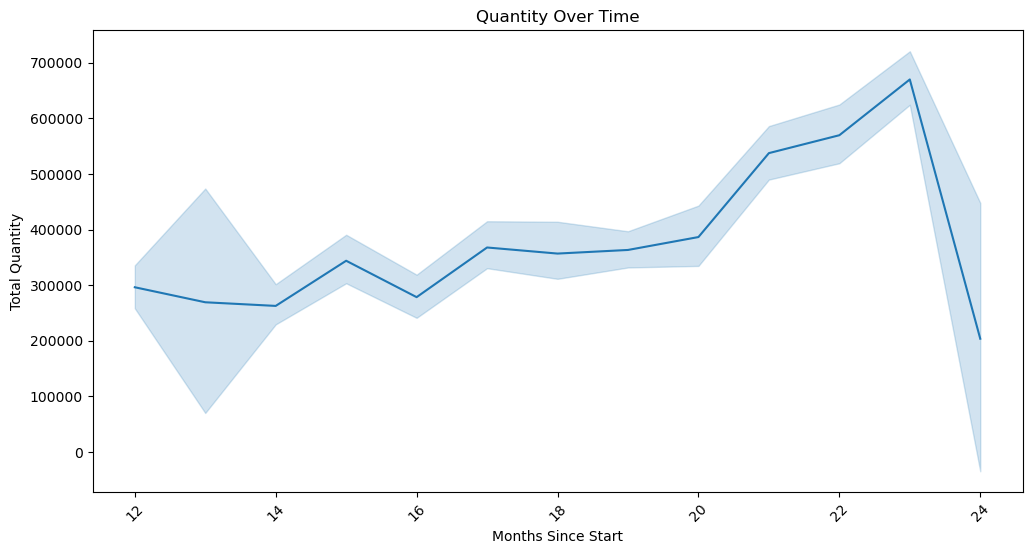

In [16]:
# Assuming you have a DataFrame named 'pivot_df' that contains your pivoted data
# If not, make sure to pivot your data as explained in previous responses

# Convert 'InvoiceDate' to a numerical format representing months
pivot_df['YearMonth'] = (pivot_df['InvoiceDate'].dt.year - pivot_df['InvoiceDate'].dt.year.min()) * 12 + pivot_df['InvoiceDate'].dt.month

# Line plot of Quantity over time (InvoiceDate)
plt.figure(figsize=(12, 6))
sns.lineplot(data=pivot_df, x='YearMonth', y='Quantity', estimator='sum')
plt.title('Quantity Over Time')
plt.xlabel('Months Since Start')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.show()


# Data Visualization of Actual vs. Predicted Quantity

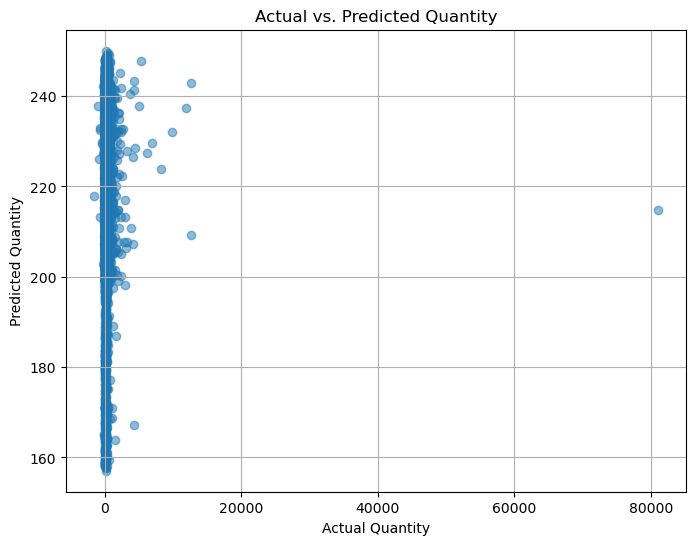

In [15]:
# Assuming you have made predictions using your model and stored them in 'y_pred'
# Also, you have the corresponding true values in 'y_test'

# Create a scatter plot to compare predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Quantity')
plt.xlabel('Actual Quantity')
plt.ylabel('Predicted Quantity')
plt.grid(True)
plt.show()

# You can also create additional visualizations or evaluation plots as needed
